In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

In [2]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


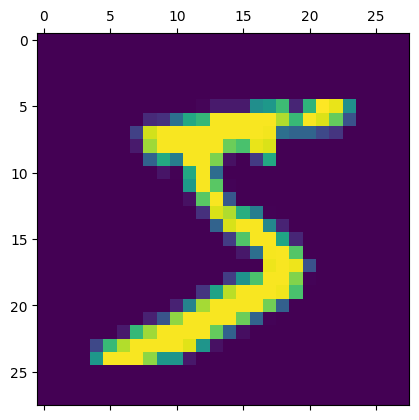

In [5]:
#to see how first image looks
plt.matshow(x_train[0])

In [6]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7442 - loss: 1.0177 - val_accuracy: 0.9036 - val_loss: 0.3528
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9038 - loss: 0.3473 - val_accuracy: 0.9189 - val_loss: 0.2879
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9195 - loss: 0.2872 - val_accuracy: 0.9277 - val_loss: 0.2552
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9263 - loss: 0.2644 - val_accuracy: 0.9331 - val_loss: 0.2332
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9329 - loss: 0.2364 - val_accuracy: 0.9375 - val_loss: 0.2176
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9374 - loss: 0.2217 - val_accuracy: 0.9409 - val_loss: 0.2047
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9449 - loss: 0.2009 - val_accuracy: 0.9442 - val_loss: 0.1915
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9451 - loss: 0.1896 -

In [12]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9436 - loss: 0.1910
Loss = 0.163
Accuracy = 0.952


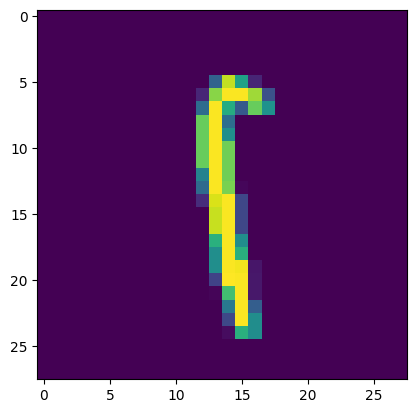

In [13]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

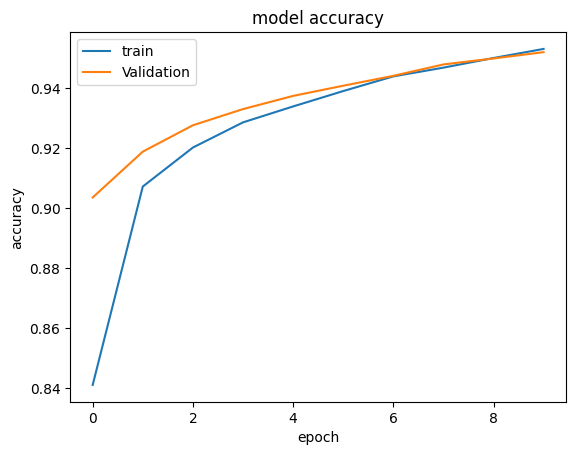

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()

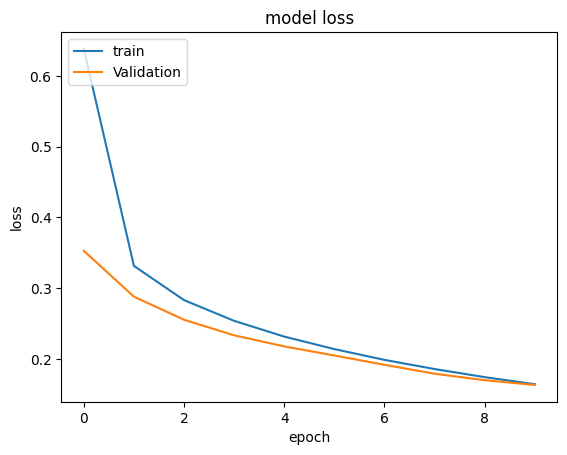

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()